# Regresiones y función de costo
###### https://www.chreinvent.com/recursos/regresi%C3%B3n-ridge

Comparativa de modelos

Esto es con el objeto de ver que en este caso la regresión ridge es la mejor opción de ajuste de los datos.

Se trata de un ejemplo en donde se generan 1000 muestras de 10 variables independientes 
+ que posteriormente se ajustan de manera regresiva para ser representadas por un recta. La matriz X tiene la siguiente estructura:
    + Cada fila representa una muestra u observación.
    + Cada columna representa una característica o variable independiente.

La generación de datos simulados nos permite crear un entorno controlado para probar modelos de regresión. 
+ La matriz X se estructura con valores aleatorios y la variable y se genera como una combinación lineal de algunas variables relevantes en X, 
    + con ruido añadido para simular variabilidad real en los datos.

+ Este código genera un conjunto de datos simulados, ajusta tres tipos de modelos de regresión (Lineal Múltiple, Ridge y Lasso), 
    + y compara su rendimiento utilizando el error cuadrático medio (MSE) y los coeficientes. 
+ También genera un gráfico comparativo de los valores predichos frente a los valores reales para evaluar visualmente el rendimiento de cada modelo.


Error Cuadrático Medio (Regresión Lineal Múltiple): 0.24
Error Cuadrático Medio (Regresión Ridge): 0.23
Error Cuadrático Medio (Regresión Lasso): 0.49
Coeficientes de la Regresión Lineal Múltiple: [ 2.96100403  2.03617541 -1.03249803 -0.00421661 -0.09079631  0.07555563
 -0.07562623  0.01338731 -0.07744314 -0.06689105]
Coeficientes de la Regresión Ridge: [ 2.91658987e+00  2.00569283e+00 -1.01664633e+00 -1.40325766e-03
 -8.81873526e-02  7.63277357e-02 -7.57544910e-02  1.16202073e-02
 -7.73753528e-02 -6.62211975e-02]
Coeficientes de la Regresión Lasso: [ 1.71322431  0.87213479 -0.          0.         -0.          0.
 -0.         -0.         -0.         -0.        ]


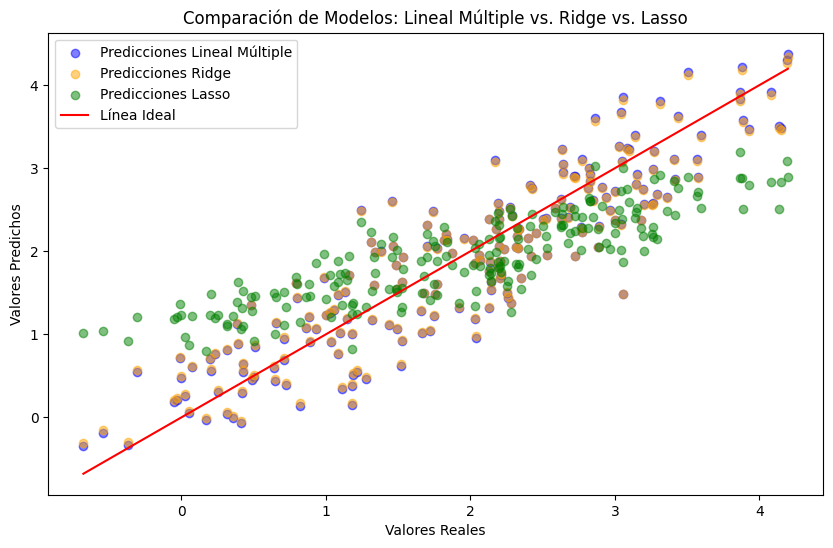

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Generar datos simulados
np.random.seed(0)
n_samples = 1000
n_features = 10

# Crear variables independientes (predictores)
X = np.random.rand(n_samples, n_features)

# Crear variable dependiente (resultado) con algo de ruido
coef = np.array([3, 2, -1] + [0] * (n_features - 3))  # Solo las primeras tres variables son relevantes
y = np.dot(X, coef) + np.random.randn(n_samples) * 0.5  # Nivel de estrés con ruido

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustar los modelos
# Regresión Lineal Múltiple
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)

# Regresión Ridge
modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_train, y_train)
y_pred_ridge = modelo_ridge.predict(X_test)

# Regresión Lasso
modelo_lasso = Lasso(alpha=0.1)
modelo_lasso.fit(X_train, y_train)
y_pred_lasso = modelo_lasso.predict(X_test)

# Evaluar los modelos
mse_lineal = mean_squared_error(y_test, y_pred_lineal)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Error Cuadrático Medio (Regresión Lineal Múltiple): {mse_lineal:.2f}")
print(f"Error Cuadrático Medio (Regresión Ridge): {mse_ridge:.2f}")
print(f"Error Cuadrático Medio (Regresión Lasso): {mse_lasso:.2f}")

print("Coeficientes de la Regresión Lineal Múltiple:", modelo_lineal.coef_)
print("Coeficientes de la Regresión Ridge:", modelo_ridge.coef_)
print("Coeficientes de la Regresión Lasso:", modelo_lasso.coef_)

# Gráfico comparativo de los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lineal, color='blue', alpha=0.5, label='Predicciones Lineal Múltiple')
plt.scatter(y_test, y_pred_ridge, color='orange', alpha=0.5, label='Predicciones Ridge')
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.5, label='Predicciones Lasso')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Línea Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Modelos: Lineal Múltiple vs. Ridge vs. Lasso')
plt.legend()
plt.show()


Los resultados de aplicar los tres modelos de regresión son:

1. Error Cuadrático Medio (Regresión Lineal Múltiple): 0.24 
2. **Error Cuadrático Medio (Regresión Ridge): 0.23**
3. Error Cuadrático Medio (Regresión Lasso): 0.49 

**Interpretación**

En la grafica pueden verse los resultados de las predicciones de los tres modelos para disntintos valores de X y su comparación con los valores reales. 

Pero lo más importante es observar los errores cuadrados que surgen de la función de costo correspondiente. 
+ En efecto el error cuadrático medio es menor para el modelo de regresión ridge y por lo tanto, para este caso, la regresión ridge es el mejor modelo.

______________________